This notebook uses data generated on an x64 workstation using the gfdl-ws site files and intel compiler,
using
```
module load ifort/11.1.073
module load intel_compilers
module use /home/sdu/publicmodules
module load netcdf/4.2
module load mpich2/1.5b1
```
for the `build/intel/env` file and run-time environment.

Use
```
module swap python python/3.4.3
ipython notebook
```
to see/use this notebook.

In [1]:
import numpy
import scipy.io.netcdf
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (16.0, 4.0)

Populating the interactive namespace from numpy and matplotlib


In [2]:
bml_prog_z=scipy.io.netcdf_file('BML/prog_z.nc','r')
kpp_prog_z=scipy.io.netcdf_file('KPP/prog_z.nc','r')
epbl_prog_z=scipy.io.netcdf_file('EPBL/prog_z.nc','r')
bml_visc=scipy.io.netcdf_file('BML/visc.nc','r')
kpp_visc=scipy.io.netcdf_file('KPP/visc.nc','r')
epbl_visc=scipy.io.netcdf_file('EPBL/visc.nc','r')
bml_prog=scipy.io.netcdf_file('BML/prog.nc','r')

In [3]:
t = bml_prog_z.variables['Time'][:]
zw = -bml_prog_z.variables['zw'][:]
zt = -bml_prog_z.variables['zt'][:]

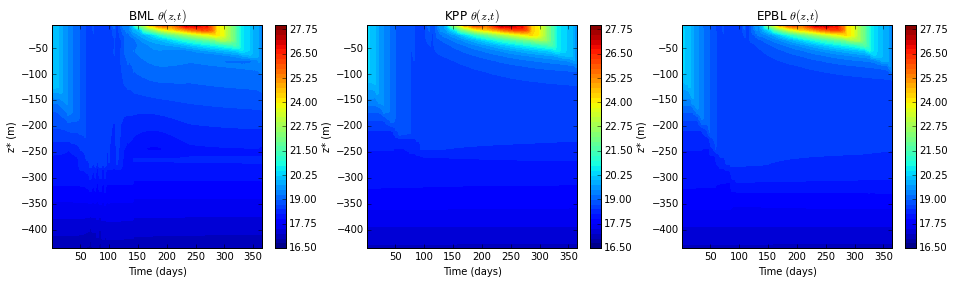

In [4]:
k=44; clevs=numpy.arange(16.5,28.25,.25)
plt.subplot(131);
plt.contourf(t[:], zt[:k], bml_prog_z.variables['temp'][:,:k,0,0].T, levels=clevs);
plt.colorbar(); plt.xlabel('Time (days)'); plt.ylabel('z* (m)'); plt.title(r'BML $\theta(z,t)$');
plt.subplot(132);
plt.contourf(t[:], zt[:k], kpp_prog_z.variables['temp'][:,:k,0,0].T, levels=clevs);
plt.colorbar(); plt.xlabel('Time (days)'); plt.ylabel('z* (m)'); plt.title(r'KPP $\theta(z,t)$');
plt.subplot(133);
plt.contourf(t[:], zt[:k], epbl_prog_z.variables['temp'][:,:k,0,0].T, levels=clevs);
plt.colorbar(); plt.xlabel('Time (days)'); plt.ylabel('z* (m)'); plt.title(r'EPBL $\theta(z,t)$');

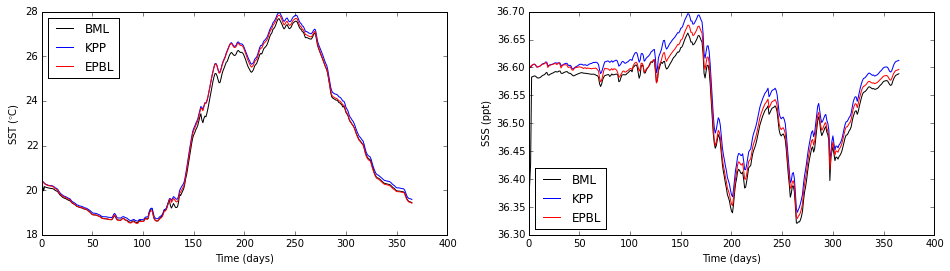

In [5]:
plt.subplot(121);
plt.plot(t[:], bml_prog_z.variables['temp'][:,0,0,0].T, 'k', label='BML');
plt.plot(t[:], kpp_prog_z.variables['temp'][:,0,0,0].T, 'b', label='KPP');
plt.plot(t[:], epbl_prog_z.variables['temp'][:,0,0,0].T, 'r', label='EPBL');
plt.legend(loc='upper left'); plt.xlabel('Time (days)'); plt.ylabel('SST ($\degree$C)');
plt.subplot(122);
plt.plot(t[:], bml_prog_z.variables['salt'][:,0,0,0].T, 'k', label='BML');
plt.plot(t[:], kpp_prog_z.variables['salt'][:,0,0,0].T, 'b', label='KPP');
plt.plot(t[:], epbl_prog_z.variables['salt'][:,0,0,0].T, 'r', label='EPBL');
plt.legend(loc='lower left'); plt.xlabel('Time (days)'); plt.ylabel('SSS (ppt)');

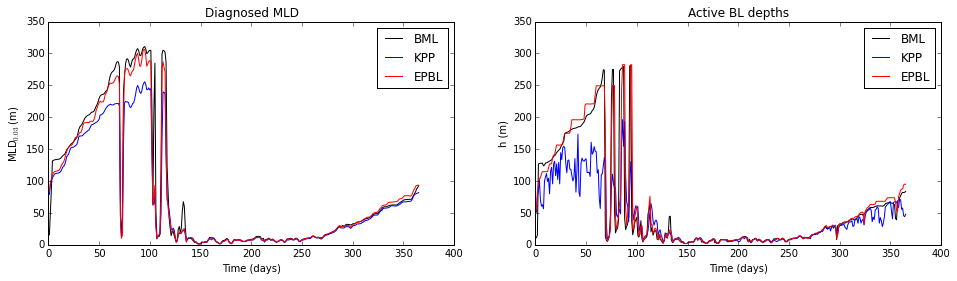

In [6]:
plt.subplot(121);
plt.plot(t[:], bml_visc.variables['MLD_003'][:,0,0].T, 'k', label='BML');
plt.plot(t[:], kpp_visc.variables['MLD_003'][:,0,0].T, 'b', label='KPP');
plt.plot(t[:], epbl_visc.variables['MLD_003'][:,0,0].T, 'r', label='EPBL');
plt.legend(loc='upper right'); plt.xlabel('Time (days)'); plt.ylabel('MLD$_{0.03}$ (m)'); plt.title('Diagnosed MLD');
plt.subplot(122); k=20
plt.plot(t[:], bml_prog.variables['h_ML'][:,0,0].T, 'k', label='BML');
plt.plot(t[:], kpp_visc.variables['KPP_OBLdepth'][:,0,0], 'b', label='KPP');
plt.plot(t[:], epbl_visc.variables['ePBL_h_ML'][:,0,0].T, 'r', label='EPBL');
plt.ylim(0,350)
plt.legend(loc='upper right'); plt.xlabel('Time (days)'); plt.ylabel('h (m)'); plt.title('Active BL depths');

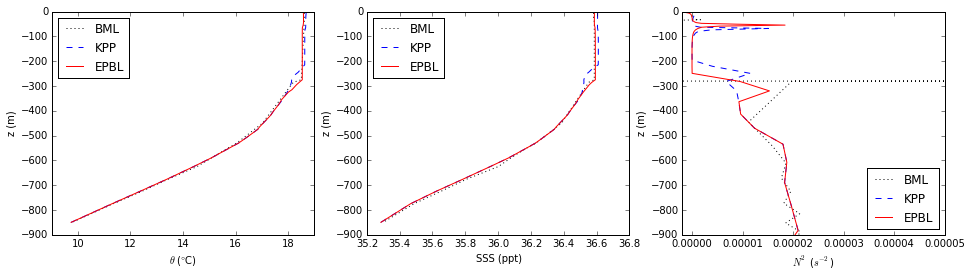

In [7]:
plt.subplot(131);n=90;dn=900;
plt.plot(bml_prog_z.variables['temp'][n::dn,:,0,0].T, zt, 'k:', label='BML');
plt.plot(kpp_prog_z.variables['temp'][n::dn,:,0,0].T, zt, 'b--', label='KPP');
plt.plot(epbl_prog_z.variables['temp'][n::dn,:,0,0].T, zt, 'r-', label='EPBL');
plt.legend(loc='upper left'); plt.xlabel(r'$\theta$ ($\degree$C)'); plt.ylabel('z (m)');
plt.subplot(132);
plt.plot(bml_prog_z.variables['salt'][n::dn,:,0,0].T, zt, 'k:', label='BML');
plt.plot(kpp_prog_z.variables['salt'][n::dn,:,0,0].T, zt, 'b--', label='KPP');
plt.plot(epbl_prog_z.variables['salt'][n::dn,:,0,0].T, zt, 'r-', label='EPBL');
plt.legend(loc='upper left'); plt.xlabel('SSS (ppt)'); plt.ylabel('z (m)');
plt.subplot(133);
plt.plot(bml_visc.variables['KPP_N2'][n::dn,:,0,0].T, bml_prog.variables['e'][n::dn,:,0,0].T, 'k:', label='BML');
plt.plot(kpp_visc.variables['KPP_N2'][n::dn,:,0,0].T, -kpp_visc.variables['zi'][:], 'b--', label='KPP');
plt.plot(epbl_visc.variables['KPP_N2'][n::dn,:,0,0].T, -epbl_visc.variables['zi'][:], 'r-', label='EPBL');
plt.xlim(-2.e-6,5.e-5); plt.ylim(-900,0)
plt.legend(loc='lower right'); plt.xlabel('$N^2$ ($s^{-2}$)'); plt.ylabel('z (m)');

In [8]:
%%bash
exec tcsh
cd ../../..
source MOM6-examples/build/intel/env; module load git
make SITE=gfdl-ws FC=mpif77 CC=mpicc LD=mpif77 MPIRUN=mpirun MOM6-examples/ocean_only/single_column/{BML,KPP,EPBL}/timestats.intel -j

make: `MOM6-examples/ocean_only/single_column/BML/timestats.intel' is up to date.
make: `MOM6-examples/ocean_only/single_column/KPP/timestats.intel' is up to date.
make: `MOM6-examples/ocean_only/single_column/EPBL/timestats.intel' is up to date.
